<a href="https://colab.research.google.com/github/kshero18/Assignments-ML/blob/main/Machine_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install yellowbrick
!sudo apt-get update
!sudo apt-get install python3-tk
!sudo apt–fix-broken install
!pip3 install yellowbrick
!pip3 install -U yellowbrick
!pip3 install -U scikit-learn
#!conda install -c districtdatalabs yellowbrick

In [91]:
import sklearn.metrics._classification
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import top_k_accuracy_score

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


#from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)


# TODO determine the best k for k-means
# TODO calculate accuracy for best K
# TODO draw a confusion matrix

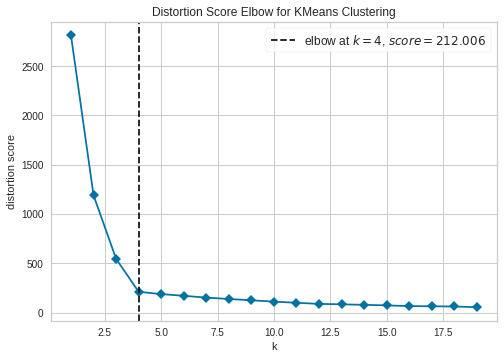

In [92]:
# TODO determine the best k for k-means

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),timings = False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#####Testing purpose

#from sklearn.datasets import load_digits
#from sklearn.model_selection import train_test_split as tts
#from sklearn.linear_model import LogisticRegression
#from yellowbrick.classifier import ConfusionMatrix
#from sklearn.cluster import KMeans
# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
#digits = load_digits()
#X = digits.data
#y = digits.target

#X.shape
#X = X.reshape(-1,1)
#y_true.shape
#y_true = y_true.reshape(-1,1)

#X_train, X_test, y_true_train, y_true_test = tts(X, y_true, random_state=0)
#model = LogisticRegression(multi_class="auto", solver="liblinear")
# The ConfusionMatrix visualizer taxes a model
#cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted␣˓→model
#cm.fit(X_train, y_true_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
#cm.score(X_test, y_true_test)
# How did we do?
#cm.show()

In [ ]:
# TODO determine the best k for k-means
from sklearn.datasets import make_blobs

# Create dataset with 3 random cluster centers and 1000 datapoints

# Reference : 
#1. https://stackoverflow.com/questions/51709878/what-does-n-features-and-centers-parameters-mean-in-make-blobs-in-scikit 
#2. https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
# The above explains what the make blobs function is used for and how to use it. 

x, y = make_blobs(n_samples = 300, centers = 4, n_features=2, shuffle=True, random_state=31)

model = KMeans()
print(model)
visualizer = KElbowVisualizer(model, k=(1,20),timings = False)
print(visualizer)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [119]:
# TODO calculate accuracy for best K
from sklearn.cluster import KMeans
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y_true)
model = KMeans()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print('accuracy: {}%'.format(acc))

print("Shape of X train data: " , X_train.shape)
print("Shape of X test data: " , X_test.shape)
print("Shape of y train data: " , y_train.shape)
print("Shape of y test data: " , y_test.shape)
#y_true = y_true.reshape(-1, 1)
#print(y_test.shape)
#print(y_true.shape)
#y_pred.shape

accuracy: 30.666666666666664%
Shape of X train data:  (225, 2)
Shape of X test data:  (75, 2)
Shape of y train data:  (225,)
Shape of y test data:  (75,)


In [95]:
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
#disp = confusion_matrix(X,y_pred)

In [87]:
#import numpy
#print(y_pred.shape)
#y_pred = y_pred.reshape(y_pred.shape[:1])
#y_pred = y_pred.transpose()
#numpy.transpose(y_pred)  

#import pandas as pd
#df1 = pd.DataFrame(data=y_pred)
#df1_transposed = df1.T
#print(df1_transposed.shape)
#df2 = pd.DataFrame(data=y_true)
#df2.shape

#y_pred = y_pred.values.reshape((75,1))
#y_true = y_true.values.reshape((1,300))
#print(y_pred.shape)
#print(y_true.shape)

#y_true.shape
#y_true1 = y_true.reshape(-1,1)
#print(y_true.shape)

#y_pred.shape
#y_pred = y_pred.reshape(-1,1)
#y_pred = y_pred.T
#y_pred.shape

Shape of y_true data:  (300,)
Shape of y_pred data:  (75,)
Shape of y_true[1:76]  data:  (75,)
y_true data values:  [3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3 3
 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2 2
 3]
y_pred data values:  [3 2 2 2 2 0 3 3 2 1 2 0 2 2 3 0 2 2 2 1 2 1 3 3 2 0 2 2 3 1 3 2 1 0 0 3 3
 2 0 3 3 1 3 2 2 3 3 1 0 1 1 3 3 2 2 0 1 2 0 3 3 0 0 2 3 2 2 1 3 0 0 0 3 3
 1]


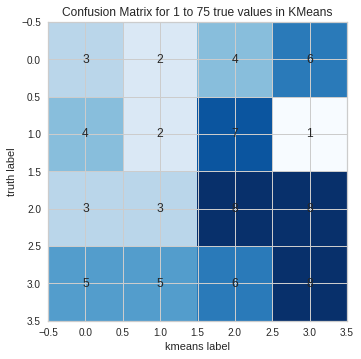

In [117]:
# Reference : 
#1. https://www.quora.com/How-do-I-make-a-confusion-matrix-for-a-K-means-model
#2. http://web.cse.ohio-state.edu/~stiff.4/cse3521/k-means.html
# Confusion matrix can not be created for KMeans. Better way is to use 

#Still considering the Kmeans as a classifier

# Checking the shape of the y_true and the y_pred
print("Shape of y_true data: " , y_true.shape)
print("Shape of y_pred data: " , y_pred.shape)
print("Shape of y_true[1:76]  data: " , y_true[1:76].shape)

#y_true is of (300,) and a confusion matrix can only be formed when the rows and columns are equal. 
#Considering only the 1:76 list of y_true.


#### NOTE: if you are able to fit the y_true then please update this code.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true[1:76],y_pred)

print("y_true data values: " , y_true[1:76])
print("y_pred data values: " ,y_pred)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center') #adding the axis labels justification
plt.xlabel("kmeans label") #x label
plt.ylabel("truth label") #y label
plt.title("Confusion Matrix for 1 to 75 true values in KMeans") #Title
plt.show()